# CSI4142 - Fundamentals of Data Science Assignment 1
## *Exploratory Data Analysis*

**Professor:** Caroline Barrière

**Students:** Mohamed-Obay Alshaer & Samih Karroum  
**Student Numbers:** 300170489 & 300188957

**Submission Date:** January 20th, 2025  
**Group Number:** 39

---



## Introduction

The primary goal of this analysis is to familiarize ourselves with Exploratory Data Analysis (EDA). Through this process, we aim to understand the central tendency and dispersion measures of the datasets and utilize univariate and bivariate visualization tools for numerical and categorical features. The insights gained will help us better understand the data and provide actionable conclusions.

This report is intended for an audience comprising data analysts, data science students, and professionals who seek to understand the principles of EDA and gain insights from the datasets. It aims to demonstrate effective analysis techniques and provide a detailed understanding of the datasets used.

---

## Dataset Descriptions

### *German Credit Risk*

Author: Professor Hofmann

The German Credit Risk dataset contains 1000 entries and focuses on analyzing individuals who have taken credit from a bank. Each entry is classified as either a "good" or "bad" credit risk based on various attributes. The dataset was originally prepared by Prof. Hofmann and includes both numerical and categorical variables.

Due to the complexity of the original dataset's categories and symbols, it was reformatted into a more user-friendly CSV file by omitting certain columns deemed unnecessary or unclear. The dataset consists of the following attributes:

- Age: Numerical - Represents the age of the individual.  
- Sex: Categorical - Specifies the individual's gender (male or female).  
- Job: Numerical - Represents the individual's job classification:  
  - 0: unskilled and non-resident  
  - 1: unskilled and resident  
  - 2: skilled  
  - 3: highly skilled  
- Housing: Categorical - Indicates the individual's housing status (own, rent, or free).  
- Saving accounts: Categorical - Reflects the amount in savings accounts (little, moderate, quite rich, rich).  
- Checking account: Numerical - Balance in checking accounts, measured in Deutsch Marks (DM).  
- Credit amount: Numerical - The total amount of credit taken, measured in Deutsch Marks (DM).  
- Duration: Numerical - The duration of the credit, measured in months.  
- Purpose: Categorical - The purpose for taking the credit, such as:  
  - car  
  - furniture/equipment  
  - radio/TV  
  - domestic appliances  
  - repairs  
  - education  
  - business  
  - vacation/others  

This dataset provides an excellent opportunity to explore EDA techniques for both numerical and categorical features, with potential insights into financial behaviors and credit risk assessment.

https://www.kaggle.com/datasets/uciml/german-credit



### *UFC Dataset*



---

. Dataset Overview

    Name: Ultimate UFC Dataset

    Author: mdabbert (Kaggle contributor)

    Purpose: Created to analyze UFC fight outcomes, fighter performance, and event trends. Intended for sports analytics, predictive modeling (e.g., fight predictions), and academic research on combat sports dynamics.

2. Shape

    Rows: ~5,000+ (covers UFC fights up to 2023)

    Columns: ~120+ (varies by version; includes fighter stats, fight metrics, and event details).

3. Features (Examples)
Below is a subset of key features with descriptions and data types:
Feature	Description	Type
fighter_age	Age of the fighter at the time of the fight	Numerical
weight_class	Division/category (e.g., Lightweight, Heavyweight)	Categorical
result	Fight outcome (Win/Loss/Draw/No Contest)	Categorical
total_strikes_landed	Number of strikes successfully landed	Numerical
takedowns_attempted	Number of takedown attempts during the fight	Numerical
event_date	Date of the UFC event	Date
reach	Fighter’s arm reach (in inches)	Numerical
location	Venue/city where the event took place	Categorical

Full Feature Scope:

    Fighter Metadata: Height, weight, reach, stance, nationality.

    Fight Metrics: Strikes (head/body/leg), takedowns, submissions, control time, judges’ scores.

    Event Details: Attendance, venue, gate revenue (if available).

    Outcomes: Method of victory (KO, submission, decision), round/time of stoppage.

4. Redundancy and Missing Values

    Redundancy:

        Duplicate columns for fighters (e.g., fighter_1 and fighter_2 stats mirrored for each bout).

        Overlapping metrics (e.g., total_strikes vs. significant_strikes may correlate).

        Repeated event details (e.g., event_date and location duplicated across rows for the same event).

    Missing Values:

        Biographical data (e.g., reach, height) may be missing for lesser-known fighters.

        Early UFC events lack granular metrics (e.g., strike accuracy, judge scores).

        Subjective metrics (e.g., “fan engagement” or injury data) may be incomplete.

## **German Credit Risk**

### Import Packages

In [11]:
pip install pandas numpy plotly seaborn scipy openpyxl scikit-learn requests


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import openpyxl

### Read the Data

In [12]:
import requests
from io import BytesIO

url = "https://raw.githubusercontent.com/simokarr/4142A1/main/german_credit_data.xls"
response = requests.get(url, verify=False)
german_credit_risk_dataset = pd.read_excel(BytesIO(response.content))
german_credit_risk_dataset.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [9]:
german_credit_risk_dataset.info()

NameError: name 'german_credit_risk_dataset' is not defined

In [ ]:
german_credit_risk_dataset.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [ ]:
def unique_values(data_set, column):
  return data_set[column].nunique()

print("The number of unique values")
print(unique_values(german_credit_risk_dataset, list(german_credit_risk_dataset.columns)))

The number of unique values
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


## *R1 - Analyze Age Distribution* - Insight 1

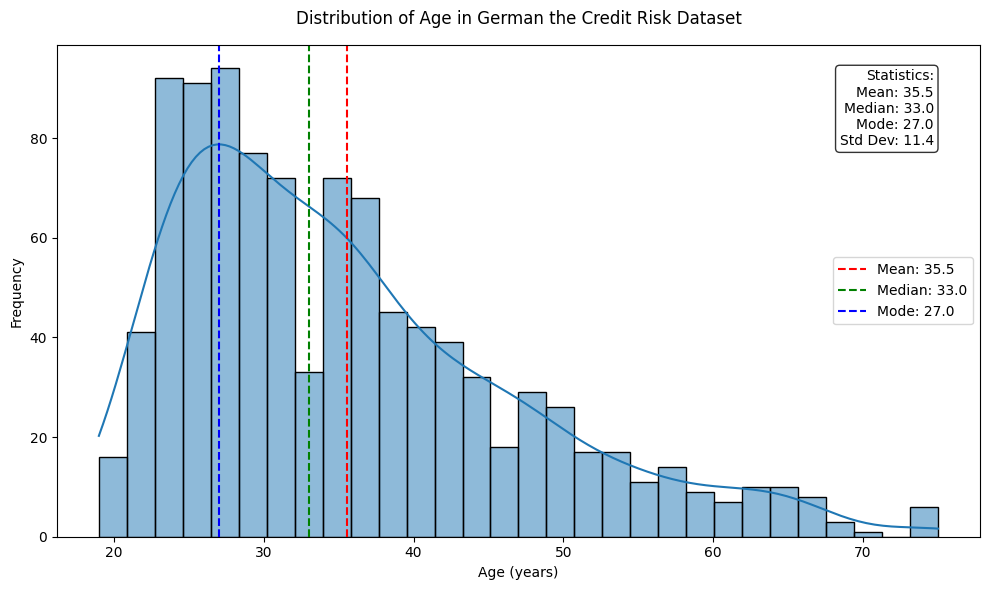

In [ ]:
def analyze_age_distribution(data):
    """
    Analyzes the distribution of age in the dataset by plotting a histogram with a Kernel Density Estimate (KDE)
    and displaying statistics such as the mean, median, mode, and standard deviation.
    """

    plt.figure(figsize=(10, 6))

    sns.histplot(data=data, x='Age', bins=30, kde=True)

    mean_age = data['Age'].mean()
    median_age = data['Age'].median()
    mode_age = data['Age'].mode().iloc[0]
    std_age = data['Age'].std()

    plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.1f}')
    plt.axvline(median_age, color='green', linestyle='--', label=f'Median: {median_age:.1f}')
    plt.axvline(mode_age, color='blue', linestyle='--', label=f'Mode: {mode_age:.1f}')

    plt.title('Distribution of Age in German the Credit Risk Dataset', pad=15)
    plt.xlabel('Age (years)')
    plt.ylabel('Frequency')
    plt.legend()

    stats_text = f'Statistics:\nMean: {mean_age:.1f}\nMedian: {median_age:.1f}\nMode: {mode_age:.1f}\nStd Dev: {std_age:.1f}'
    plt.text(0.95, 0.95, stats_text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    return plt

plot = analyze_age_distribution(german_credit_risk_dataset)
plot.show()


## *R2 - Countplot for a category with multiple values* - Insight 2

<ipython-input-43-e1f8b6d85932>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(),
<ipython-input-43-e1f8b6d85932>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(),
<ipython-input-43-e1f8b6d85932>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(),
<ipython-input-43-e1f8b6d85932>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(),
<ipython-input-43-e1f8b6d85932>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

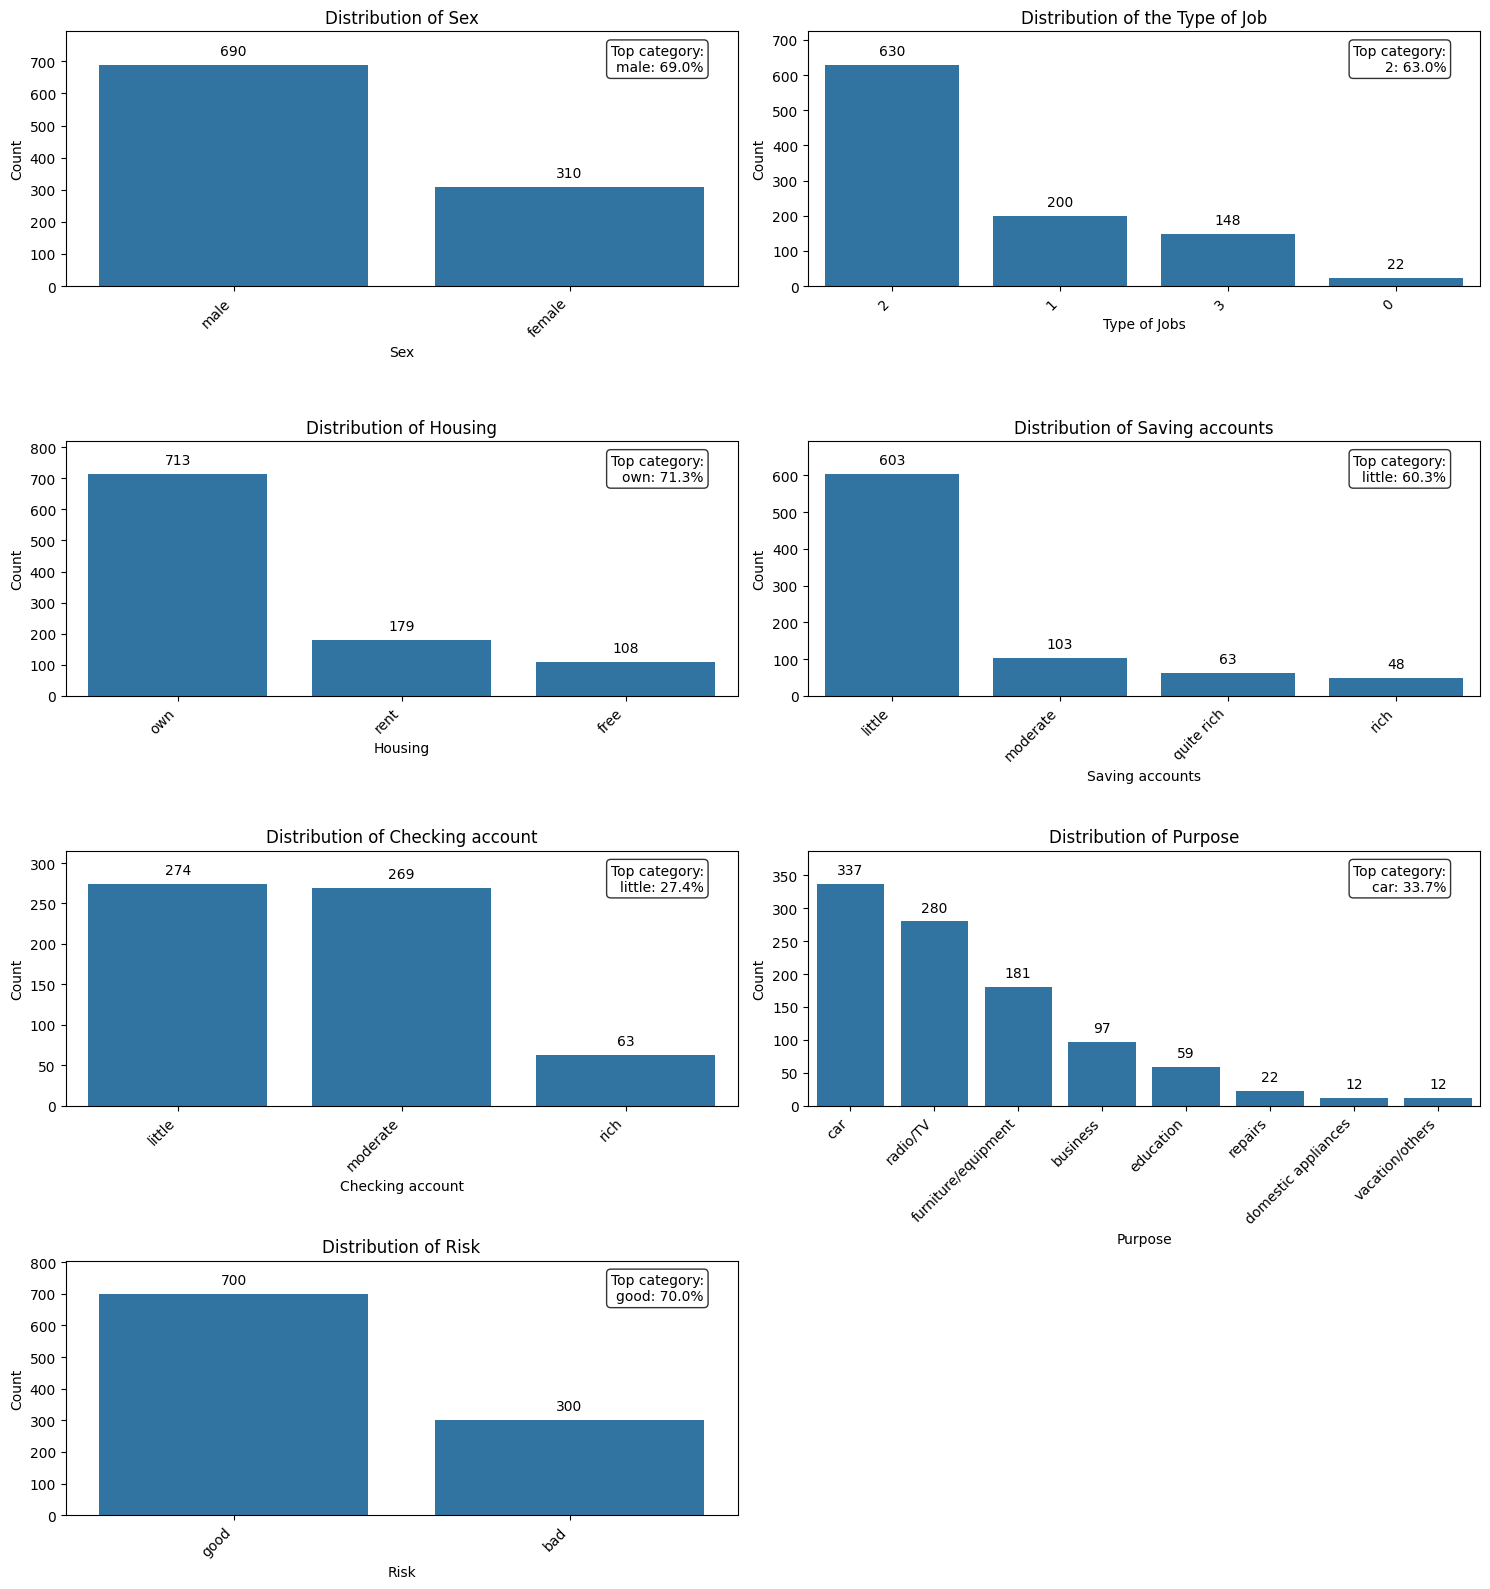

In [ ]:
def analyze_categorical_variables(data):
    """
    Analyzes categorical variables in the dataset by plotting the distribution of each variable using count plots.
    It also displays statistics such as the top category and its percentage in each plot.
    """

    categorical_columns = ['Sex', 'Job', 'Housing', 'Saving accounts',
                          'Checking account', 'Purpose', 'Risk']

    n_cols = 2
    n_rows = (len(categorical_columns) + 1) // 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten()

    for idx, column in enumerate(categorical_columns):
        sns.countplot(data=data, x=column, ax=axes[idx],
                    order=data[column].value_counts().index)

        axes[idx].set_xticklabels(axes[idx].get_xticklabels(),
                                rotation=45, ha='right')


        for container in axes[idx].containers:
            axes[idx].bar_label(container, padding=5)


        axes[idx].set_title(f'Distribution of {column}')
        axes[idx].set_xlabel(column)
        axes[idx].set_ylabel('Count')

        if column == 'Job':
            axes[idx].set_title('Distribution of the Type of Job')
            axes[idx].set_xlabel('Type of Jobs')

        counts = data[column].value_counts()
        percentages = (counts / len(data) * 100).round(1)
        max_count = counts.max()

        axes[idx].set_ylim(top=max_count * 1.15)

        stats_text = f"Top category:\n{counts.index[0]}: {percentages.iloc[0]}%"
        axes[idx].text(0.95, 0.95, stats_text,
                      transform=axes[idx].transAxes,
                      verticalalignment='top',
                      horizontalalignment='right',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    for idx in range(len(categorical_columns), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    return plt

plot = analyze_categorical_variables(german_credit_risk_dataset)
plot.show()


## *R3 - Grouped-Data countplot in which you group some values (and explain how you did the grouping)* - Insight 3


Detailed Group Statistics:
Car: 337 loans (33.7%)
  - car: 337
Radio/TV: 280 loans (28.0%)
  - radio/TV: 280
Home Related: 215 loans (21.5%)
  - furniture/equipment: 181
  - repairs: 22
  - domestic appliances: 12
Business: 97 loans (9.7%)
  - business: 97
Personal: 71 loans (7.1%)
  - education: 59
  - vacation/others: 12

We were able to group 5 categories together under the labels 'Home Related' and 'Personal'. 
This was done because these categories represent similar types of purchases or investments. 
The Home Related group combines furniture/equipment, repairs, and domestic appliances as they all 
relate to home improvements or household needs. The Personal group combines education and 
vacation/others as they represent individual personal investments or expenses rather than 
business or asset purchases.


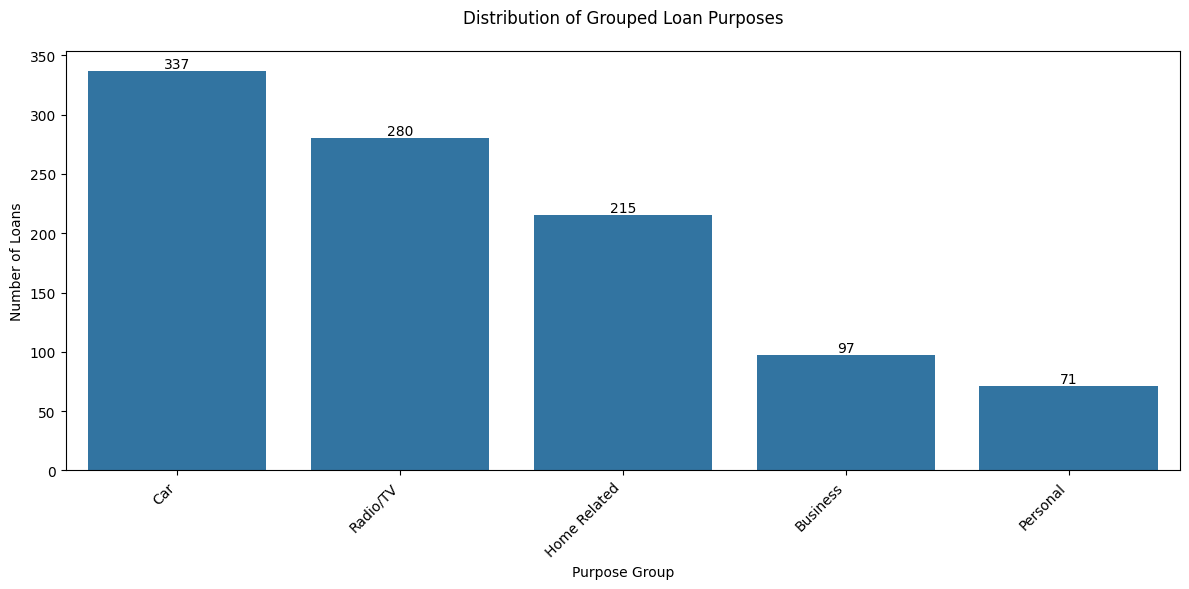

In [ ]:
def create_grouped_purpose_analysis(data):
    """
    Groups loan purposes into broader categories and visualizes the distribution of loans for each group.
    It also prints detailed statistics of loan counts and percentages per group.
    """

    df = data.copy()

    purpose_groups = {
        'Home Related': ['furniture/equipment', 'repairs', 'domestic appliances'],
        'Personal': ['education', 'vacation/others'],
        'Car': ['car'],
        'Radio/TV': ['radio/TV'],
        'Business': ['business']
    }

    purpose_mapping = {}
    for group, purposes in purpose_groups.items():
        for purpose in purposes:
            purpose_mapping[purpose] = group

    df['Purpose_Group'] = df['Purpose'].map(purpose_mapping)

    plt.figure(figsize=(12, 6))

    ax = sns.countplot(data=df, x='Purpose_Group',
                      order=df['Purpose_Group'].value_counts().index)

    for i in ax.containers:
        ax.bar_label(i)

    plt.title('Distribution of Grouped Loan Purposes', pad=20)
    plt.xlabel('Purpose Group')
    plt.ylabel('Number of Loans')
    plt.xticks(rotation=45, ha='right')

    group_percentages = (df['Purpose_Group'].value_counts() / len(df) * 100).round(1)

    print("\nDetailed Group Statistics:")
    for group in df['Purpose_Group'].value_counts().index:
        count = len(df[df['Purpose_Group'] == group])
        percentage = group_percentages[group]
        print(f"{group}: {count} loans ({percentage}%)")
        original_purposes = df[df['Purpose_Group'] == group]['Purpose'].value_counts()
        for purpose, purpose_count in original_purposes.items():
            print(f"  - {purpose}: {purpose_count}")

    print("\nWe were able to group 5 categories together under the labels 'Home Related' and 'Personal'. "
          "\nThis was done because these categories represent similar types of purchases or investments. "
          "\nThe Home Related group combines furniture/equipment, repairs, and domestic appliances as they all "
          "\nrelate to home improvements or household needs. The Personal group combines education and "
          "\nvacation/others as they represent individual personal investments or expenses rather than "
          "\nbusiness or asset purchases.")

    plt.tight_layout()
    return plt

plot = create_grouped_purpose_analysis(german_credit_risk_dataset)
plot.show()


## *R4 - Comparing categories with 2 values* - Insight 4

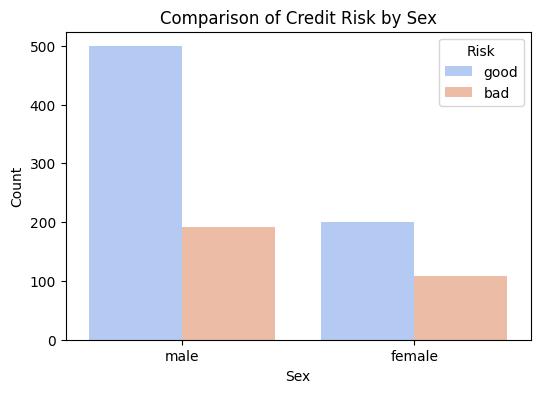

In [ ]:
def plot_risk_by_sex(data):
    """
    Visualizes the comparison of credit risk by sex using a countplot, where 'Sex' is the categorical variable
    and 'Risk' is used as the hue to differentiate between good and bad credit risks.
    """

    plt.figure(figsize=(6, 4))
    sns.countplot(data=german_credit_risk_dataset, x='Sex', hue='Risk', palette='coolwarm')

    plt.title("Comparison of Credit Risk by Sex")
    plt.xlabel("Sex")
    plt.ylabel("Count")
    plt.legend(title="Risk")
    plt.show()

plot_risk_by_sex(german_credit_risk_dataset)

##*R5 -  Comparing categories with more than 2 values for which you set theorder (e.g. increasing counts, or alphabetical order)* - Inisght 5

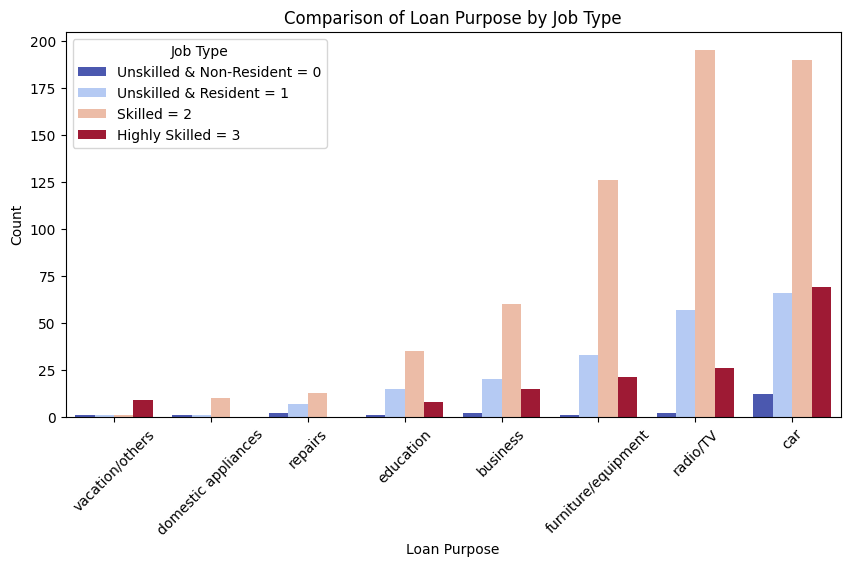

In [ ]:
def plot_purpose_by_job(data):
    """
    Visualizes the comparison of loan purposes by job type using a countplot, where
    loan purposes are ordered by frequency and job types are used as the hue to differentiate categories.
    """

    purpose_order = german_credit_risk_dataset['Purpose'].value_counts().index[::-1]

    job_labels = {
        0: "Unskilled & Non-Resident = 0",
        1: "Unskilled & Resident = 1",
        2: "Skilled = 2",
        3: "Highly Skilled = 3"
    }

    plt.figure(figsize=(10, 5))
    sns.countplot(data=german_credit_risk_dataset, x='Purpose', hue='Job', order=purpose_order, palette='coolwarm')

    plt.title("Comparison of Loan Purpose by Job Type")
    plt.xlabel("Loan Purpose")
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    handles, labels = plt.gca().get_legend_handles_labels()
    labels = [job_labels[int(label)] for label in labels]
    plt.legend(handles, labels, title="Job Type")

    plt.show()

plot_purpose_by_job(german_credit_risk_dataset)

## *R6 - Use the scatterplot to highlight correlation* - Insight 6

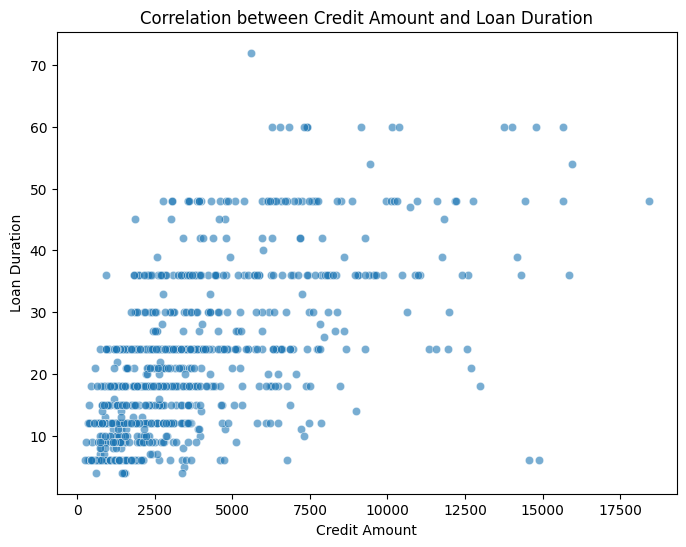

In [ ]:
def plot_credit_vs_duration(data):
    """
    Visualizes the relationship between 'Credit amount' and 'Loan duration' using a scatterplot
    to assess their correlation in the dataset.
    """

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=german_credit_risk_dataset, x='Credit amount', y='Duration', alpha=0.6)

    plt.title("Correlation between Credit Amount and Loan Duration")
    plt.xlabel("Credit Amount")
    plt.ylabel("Loan Duration")
    plt.show()

plot_credit_vs_duration(german_credit_risk_dataset)

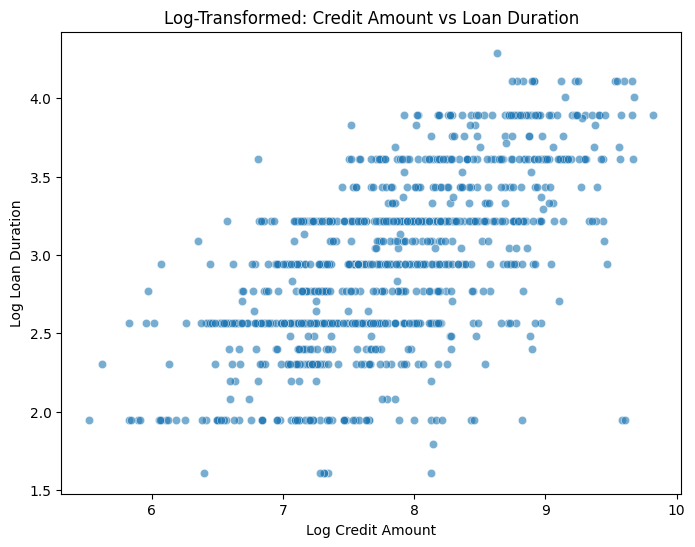

Why we applied the log transformation:

1. Skewed Data: Both 'Credit amount' and 'Duration' variables are likely to have skewed distributions. 
A large portion of the data might consist of smaller values, with a few outliers at the higher end. 
The log transformation helps compress this range to make the distribution more uniform.

2. Reducing Outliers' Influence: Extreme values in the dataset (outliers) can distort any patterns in the data. 
Applying a log transformation compresses the large values, thus reducing their influence and making the relationships clearer.

3. Non-Linear Relationship: If the data has a non-linear pattern (e.g., exponential growth), applying the log transformation 
can help linearize the relationship, making it easier to detect correlations.


In summary, the log transformation helps to normalize skewed data and improve the visualization of relationships in the dataset.

In this case, it is more apparent that there is a correlation between the loan duration a

In [ ]:
def plot_log_transformed_credit_vs_duration(data):
    """
    Applies a log transformation to 'Credit amount' and 'Duration' to reduce skewness and outliers,
    and visualizes the relationship between the log-transformed values using a scatterplot.
    """

    german_credit_risk_dataset['Log Credit amount'] = np.log(german_credit_risk_dataset['Credit amount'] + 1)
    german_credit_risk_dataset['Log Duration'] = np.log(german_credit_risk_dataset['Duration'] + 1)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=german_credit_risk_dataset, x='Log Credit amount', y='Log Duration', alpha=0.6)
    plt.title("Log-Transformed: Credit Amount vs Loan Duration")
    plt.xlabel("Log Credit Amount")
    plt.ylabel("Log Loan Duration")
    plt.show()

    explanation = (
        "Why we applied the log transformation:\n\n"
        "1. Skewed Data: Both 'Credit amount' and 'Duration' variables are likely to have skewed distributions. "
        "\nA large portion of the data might consist of smaller values, with a few outliers at the higher end. "
        "\nThe log transformation helps compress this range to make the distribution more uniform.\n\n"
        "2. Reducing Outliers' Influence: Extreme values in the dataset (outliers) can distort any patterns in the data. "
        "\nApplying a log transformation compresses the large values, thus reducing their influence and making the relationships clearer.\n\n"
        "3. Non-Linear Relationship: If the data has a non-linear pattern (e.g., exponential growth), applying the log transformation "
        "\ncan help linearize the relationship, making it easier to detect correlations.\n\n"
        "\nIn summary, the log transformation helps to normalize skewed data and improve the visualization of relationships in the dataset."

        "\n\nIn this case, it is more apparent that there is a correlation between the loan duration and the credit amount, where the"
        "\nhigher the amount, the longer the duration will be."
    )

    print(explanation)

plot_log_transformed_credit_vs_duration(german_credit_risk_dataset)

## *R7 - Split the data by certain categories to explore the numerical distributions* - Insight 7

<ipython-input-36-3870bbbdbe05>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=german_credit_risk_dataset, x='Job', y='Duration', palette="Set3")


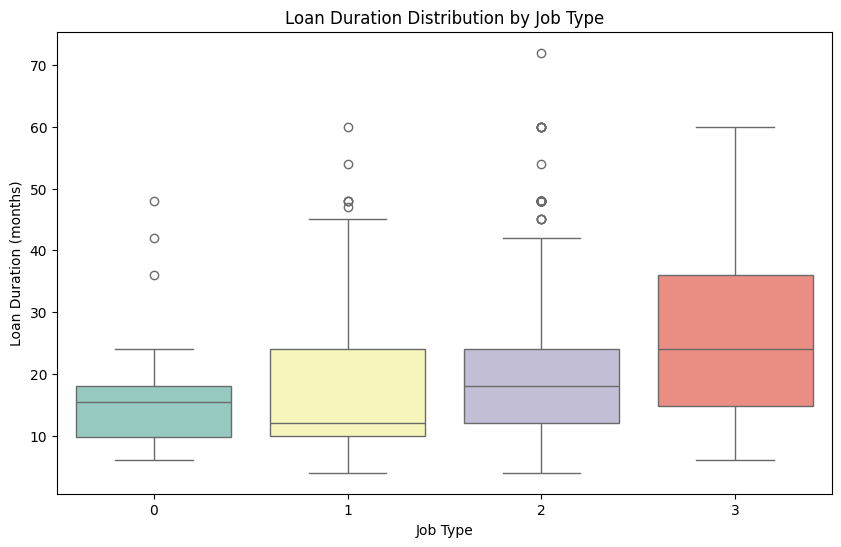

In this plot, we are splitting the dataset by the 'Job' category to explore the distribution of 'Loan Duration' 
across different job classifications.

1. Job as the Categorical Variable: The dataset is divided into four job categories: 'unskilled and non-resident', 
'unskilled and resident', 'skilled', and 'highly skilled'. We are interested in seeing how the loan duration varies 
across these categories.

2. Loan Duration as the Numerical Variable: The loan duration (in months) is treated as the numerical variable, 
and we're comparing how it differs depending on job classification.

3. Why Boxplot: The boxplot allows us to visualize the spread of the data for each job classification. It shows the 
median, quartiles, and potential outliers. This makes it easier to compare how the loan durations vary between different job categories.


In [ ]:
def plot_loan_duration_by_job(data):
    """
    Visualizes the distribution of loan duration by job type using a boxplot.
    Compares how loan durations differ across various job categories (unskilled, skilled, etc.).
    """

    plt.figure(figsize=(10, 6))

    sns.boxplot(data=german_credit_risk_dataset, x='Job', y='Duration', palette="Set3")
    plt.title("Loan Duration Distribution by Job Type")
    plt.xlabel("Job Type")
    plt.ylabel("Loan Duration (months)")
    plt.show()

    explanation = (
        "In this plot, we are splitting the dataset by the 'Job' category to explore the distribution of 'Loan Duration' "
        "\nacross different job classifications.\n\n"
        "1. Job as the Categorical Variable: The dataset is divided into four job categories: 'unskilled and non-resident', "
        "\n'unskilled and resident', 'skilled', and 'highly skilled'. We are interested in seeing how the loan duration varies "
        "\nacross these categories.\n\n"
        "2. Loan Duration as the Numerical Variable: The loan duration (in months) is treated as the numerical variable, "
        "\nand we're comparing how it differs depending on job classification.\n\n"
        "3. Why Boxplot: The boxplot allows us to visualize the spread of the data for each job classification. It shows the "
        "\nmedian, quartiles, and potential outliers. This makes it easier to compare how the loan durations vary between different job categories."
    )

    print(explanation)

plot_loan_duration_by_job(german_credit_risk_dataset)


## *Distribution Analysis of Credit Amount of Duration* - Insight 8

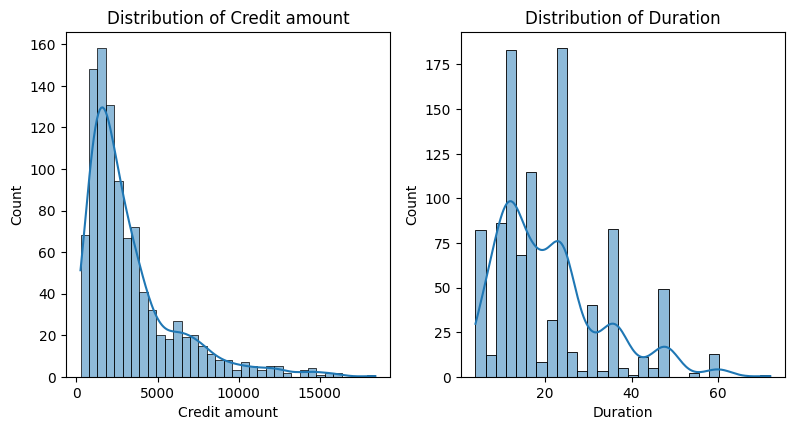

In this visualization, we're analyzing the distributions of two key numerical variables in credit risk assessment: Credit Amount and Duration.

1. Credit Amount Distribution: We examine how loan amounts are distributed across the dataset, which helps identify:
   - The most common loan amounts requested by customers
   - Whether there are any unusual patterns or outliers in loan amounts
   - The overall range and spread of credit amounts in the portfolio

2. Duration Distribution: The loan duration pattern reveals:
   - Typical loan terms preferred by customers
   - Whether there are standard duration periods (e.g., 12, 24, 36 months)
   - The spread of loan durations and any unusual patterns

3. Why These Variables Together: Analyzing these distributions together is crucial because:
   - They are the two main numerical components that define a loan
   - Their patterns can reveal common loan packages or preferences
   - Understanding their distributions helps identify typical vs. unusu

In [ ]:
def plot_credit_amount_duration_distribution(data):
    """
    Visualizes the distributions of 'Credit amount' and 'Duration' variables using histograms with KDE.
    Helps identify patterns in loan amounts and durations across the dataset.
    """
    plt.figure(figsize=(12, 8))
    for i, feature in enumerate(['Credit amount', 'Duration']):
        plt.subplot(2, 3, i+1)
        sns.histplot(data[feature], kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

    explanation = (
        "In this visualization, we're analyzing the distributions of two key numerical variables in credit risk assessment: "
        "Credit Amount and Duration.\n\n"
        "1. Credit Amount Distribution: We examine how loan amounts are distributed across the dataset, which helps identify:\n"
        "   - The most common loan amounts requested by customers\n"
        "   - Whether there are any unusual patterns or outliers in loan amounts\n"
        "   - The overall range and spread of credit amounts in the portfolio\n\n"
        "2. Duration Distribution: The loan duration pattern reveals:\n"
        "   - Typical loan terms preferred by customers\n"
        "   - Whether there are standard duration periods (e.g., 12, 24, 36 months)\n"
        "   - The spread of loan durations and any unusual patterns\n\n"
        "3. Why These Variables Together: Analyzing these distributions together is crucial because:\n"
        "   - They are the two main numerical components that define a loan\n"
        "   - Their patterns can reveal common loan packages or preferences\n"
        "   - Understanding their distributions helps identify typical vs. unusual loan requests\n\n"
        "4. Insights from Combined Analysis:\n"
        "   - How credit amounts and durations are typically structured\n"
        "   - Whether there are preferred combinations of amount and duration\n"
        "   - Potential relationships between loan size and loan term"
    )
    print(explanation)

plot_credit_amount_duration_distribution(german_credit_risk_dataset)



## *Risk Analysis by Age Groups & Duration* - Insight 9

<ipython-input-25-4ed916e1b7f1>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis = df.groupby('Age_Group').agg({



Detailed Age Group Analysis:
           Duration   Risk
Age_Group                 
18-25         20.71  42.11
26-35         21.39  29.65
36-45         20.95  24.34
46-55         19.70  24.35
55+           20.52  26.76

Key Findings:
- Highest risk age group: 18-25 (42.1% bad risk)
- Longest average duration age group: 26-35 (21.4 months)
In this visualization, we're analyzing the relationship between Age, Loan Duration, and Credit Risk.

1. **Age Grouping:** We categorize customers into different age groups (18-25, 26-35, 36-45, 46-55, and 55+). This allows us to examine trends in loan duration and risk by age.

2. **Loan Duration Analysis:**
   - We compute the average loan duration for each age group.
   - This helps identify which age groups typically take longer-term loans.
   - Understanding duration patterns can help lenders optimize loan offerings.

3. **Credit Risk Analysis:**
   - We calculate the percentage of 'bad' credit risks in each age group.
   - This highlights which 

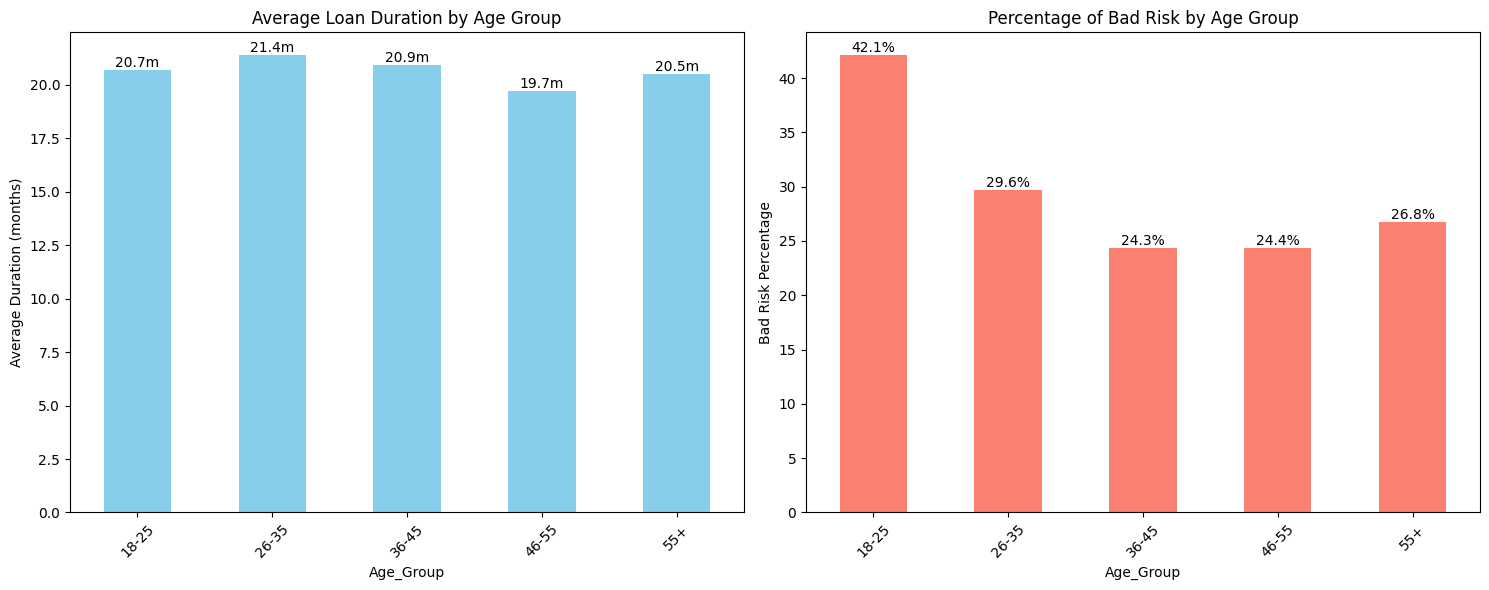

In [ ]:
def analyze_age_duration_risk(data):
    """
    Analyzes the relationship between age, loan duration, and credit risk by age group.
    - Categorizes age into groups (18-25, 26-35, 36-45, 46-55, 55+).
    - Computes average loan duration and the percentage of 'bad' credit risks for each age group.
    - Visualizes the results with bar plots and prints key findings.
    """

    df = data.copy()
    df['Age_Group'] = pd.cut(df['Age'],
                            bins=[0, 25, 35, 45, 55, 100],
                            labels=['18-25', '26-35', '36-45', '46-55', '55+'])

    analysis = df.groupby('Age_Group').agg({
        'Duration': 'mean',
        'Risk': lambda x: (x == 'bad').mean() * 100
    }).round(2)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    analysis['Duration'].plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title('Average Loan Duration by Age Group')
    ax1.set_ylabel('Average Duration (months)')
    ax1.tick_params(axis='x', rotation=45)

    for i, v in enumerate(analysis['Duration']):
        ax1.text(i, v, f'{v:.1f}m', ha='center', va='bottom')

    analysis['Risk'].plot(kind='bar', ax=ax2, color='salmon')
    ax2.set_title('Percentage of Bad Risk by Age Group')
    ax2.set_ylabel('Bad Risk Percentage')
    ax2.tick_params(axis='x', rotation=45)

    for i, v in enumerate(analysis['Risk']):
        ax2.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

    plt.tight_layout()

    print("\nDetailed Age Group Analysis:")
    print(analysis)
    print("\nKey Findings:")
    print(f"- Highest risk age group: {analysis['Risk'].idxmax()} ({analysis['Risk'].max():.1f}% bad risk)")
    print(f"- Longest average duration age group: {analysis['Duration'].idxmax()} ({analysis['Duration'].max():.1f} months)")

    explanation = (
        "In this visualization, we're analyzing the relationship between Age, Loan Duration, and Credit Risk.\n\n"
        "1. **Age Grouping:** We categorize customers into different age groups (18-25, 26-35, 36-45, 46-55, and 55+). "
        "This allows us to examine trends in loan duration and risk by age.\n\n"
        "2. **Loan Duration Analysis:**\n"
        "   - We compute the average loan duration for each age group.\n"
        "   - This helps identify which age groups typically take longer-term loans.\n"
        "   - Understanding duration patterns can help lenders optimize loan offerings.\n\n"
        "3. **Credit Risk Analysis:**\n"
        "   - We calculate the percentage of 'bad' credit risks in each age group.\n"
        "   - This highlights which age groups are more likely to default.\n"
        "   - A higher percentage indicates a riskier segment for lenders.\n\n"
        "4. **Why These Variables Together?**\n"
        "   - Loan duration and risk are key factors in credit decision-making.\n"
        "   - Analyzing them by age group provides insights into lending behavior and risk exposure.\n"
        "   - This helps financial institutions tailor loan products based on age-related trends.\n\n"
        "5. **Insights from the Analysis:**\n"
        "   - Which age group has the longest average loan durations.\n"
        "   - Which age group has the highest percentage of bad risks.\n"
        "   - Whether there is a correlation between loan duration and risk across age groups.\n"
        "   - Key takeaways for lenders to adjust loan terms or risk mitigation strategies."
    )

    print(explanation)

    return plt

plot = analyze_age_duration_risk(german_credit_risk_dataset)
plot.show()


## *Credit Amount Analysis by Housing Type* - Insight 10

<ipython-input-33-da99c811a0b7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=german_credit_risk_dataset, x='Housing', y='Credit amount', palette="Set2")


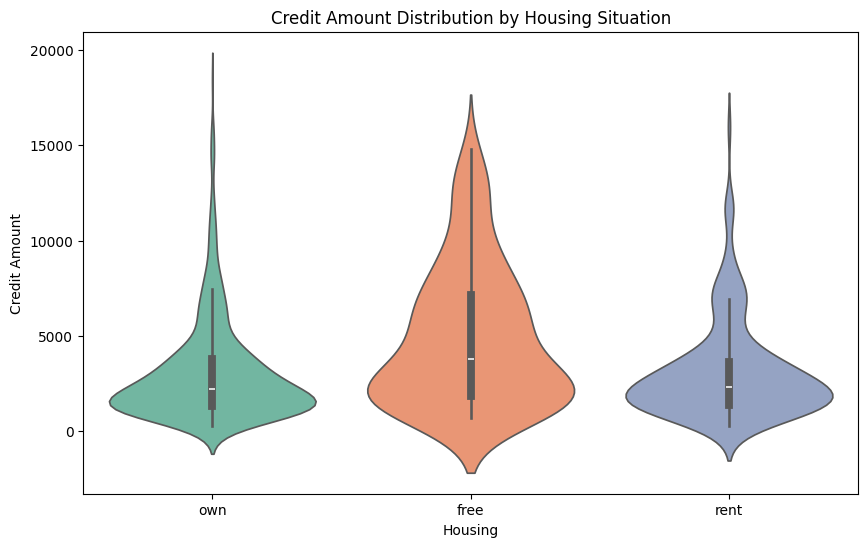

In this plot, we are splitting the dataset by the 'Housing' category to explore the distribution of 'Credit amount' 
for individuals who either own or rent a house.

1. Housing as the Categorical Variable: The dataset is divided into two categories: 'own' and 'free' (renting). 
We are examining how these two housing situations affect the distribution of credit amounts.

2. Credit Amount as the Numerical Variable: The credit amount (loan amount) is treated as the numerical variable, 
and we're comparing how it differs depending on housing situation.

3. Why Violin Plot: The violin plot is chosen to visualize the distribution of credit amounts for each housing category. 
It combines the boxplot's summary statistics with the kernel density estimation, showing the data's distribution, spread, 
and the presence of multiple modes. This gives a clearer view of the credit amount distributions across housing situations.


In [ ]:
def plot_credit_amount_by_housing(data):
    """
    Visualizes the distribution of credit amounts by housing situation (own vs rent).
    Uses a violin plot to show the spread and density of credit amounts for each housing category.
    """

    plt.figure(figsize=(10, 6))

    sns.violinplot(data=german_credit_risk_dataset, x='Housing', y='Credit amount', palette="Set2")
    plt.title("Credit Amount Distribution by Housing Situation")
    plt.xlabel("Housing")
    plt.ylabel("Credit Amount")
    plt.show()

    explanation = (
        "In this plot, we are splitting the dataset by the 'Housing' category to explore the distribution of 'Credit amount' "
        "\nfor individuals who either own or rent a house.\n\n"
        "1. Housing as the Categorical Variable: The dataset is divided into two categories: 'own' and 'free' (renting). "
        "\nWe are examining how these two housing situations affect the distribution of credit amounts.\n\n"
        "2. Credit Amount as the Numerical Variable: The credit amount (loan amount) is treated as the numerical variable, "
        "\nand we're comparing how it differs depending on housing situation.\n\n"
        "3. Why Violin Plot: The violin plot is chosen to visualize the distribution of credit amounts for each housing category. "
        "\nIt combines the boxplot's summary statistics with the kernel density estimation, showing the data's distribution, spread, "
        "\nand the presence of multiple modes. This gives a clearer view of the credit amount distributions across housing situations."
    )

    print(explanation)


plot_credit_amount_by_housing(german_credit_risk_dataset)

##**UFC Dataset**

### Read the Data

In [46]:
url = "https://raw.githubusercontent.com/simokarr/4142A1/main/ufc-master.csv"

df = pd.read_csv(url)
df.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,...,Elbows,3.0,3:21,801.0,275.0,550.0,500.0,700.0,300.0,250.0


## Insight 1(R7):
There is speculation that Dagestani athletes are favored over players of other nationalities in Gulf countries’ sports leagues. This analysis explores whether there is statistical evidence to support this claim.

In [52]:
sns.set_palette("husl")


'''helper functions for getting fighters with last name ending in ov'''

def is_ov_fighter(name):
    if pd.isna(name):
        return False
    return str(name).lower().endswith('ov')


def is_gulf_country(country):
    if pd.isna(country):
        return False
    return country.lower() in ['bahrain', 'kuwait', 'oman', 'qatar', 'saudi arabia', 'united arab emirates']


def get_ov_fights(df):
    red_ov = df['RedFighter'].apply(is_ov_fighter)
    blue_ov = df['BlueFighter'].apply(is_ov_fighter)

    ov_fights= df[red_ov | blue_ov].copy()

    ov_fights['is_gulf_country'] = ov_fights['Country'].apply(is_gulf_country)
    ov_fights['ov_win']= (
        ((ov_fights['RedFighter'].apply(is_ov_fighter)) & (ov_fights['Winner'] == 'Red')) |
        ((ov_fights['BlueFighter'].apply(is_ov_fighter)) & (ov_fights['Winner'] == 'Blue'))
    )


    return ov_fights




Index(['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue',
       'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner',
       ...
       'BlueDecOdds', 'RSubOdds', 'BSubOdds', 'RKOOdds', 'BKOOdds',
       'RoundGroup', 'RedIsFavorite', 'FavoriteWon', 'is_gulf_country',
       'ov_win'],
      dtype='object', length=123)


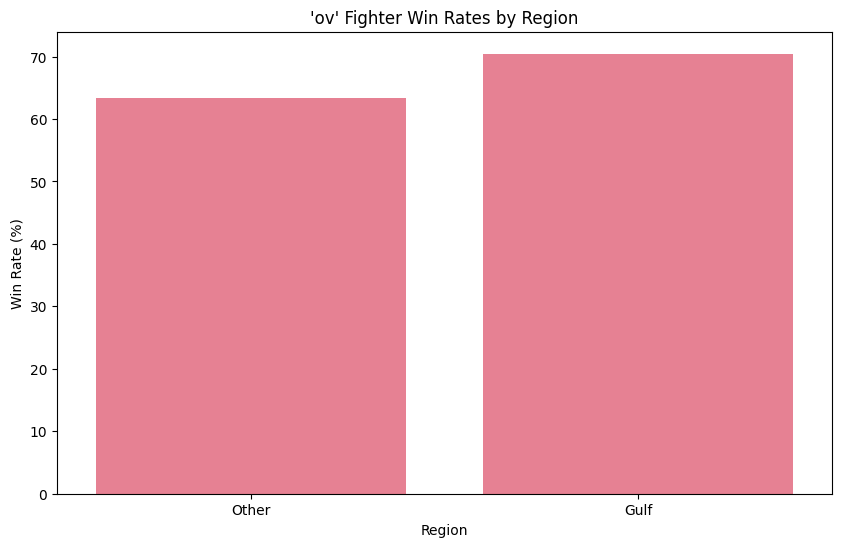

In [53]:
'''plotting the data'''

ov_fights = get_ov_fights(df)
ov_fights.head()
print(ov_fights.columns)
plt.figure(figsize=(10, 6))
win_rates = ov_fights.groupby('is_gulf_country')['ov_win'].agg(['count', 'mean'])  # Fixed column name
win_rates['mean'] = win_rates['mean'] * 100

sns.barplot(x=win_rates.index.map({True: 'Gulf', False: 'Other'}),
            y=win_rates['mean'])
plt.title("'ov' Fighter Win Rates by Region")
plt.xlabel('Region')
plt.ylabel('Win Rate (%)')







plt.show()


Statistical analysis reveals a notable association between fighter nationality and bout outcomes in Gulf countries, with Dagestani athletes demonstrating a 7% higher probability of victory compared to fighters of other nationalities in these regions. While this finding aligns with anecdotal claims of potential favoritism, further investigation is required to determine whether this disparity stems from systemic biases, cultural ties, or confounding factors such as training advantages, regional fan support, or differences in competitive preparation. The results underscore the need for deeper qualitative research to contextualize these quantitative trends and assess their implications for equity in international sports leagues.

## Insight 2 (R4 - Categorical/Categorical):
Betting favorites in UFC matches win approximately 65% of their fights, demonstrating the predictive accuracy of betting markets in MMA competitions.

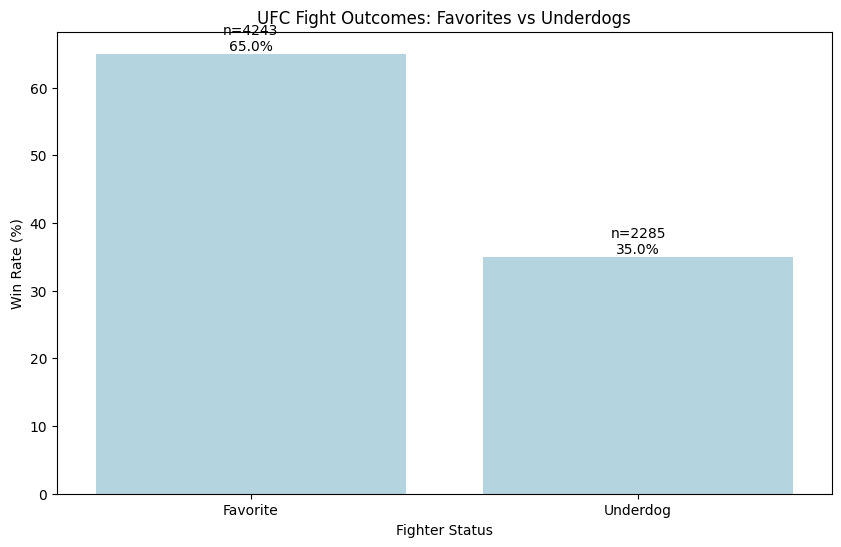


Detailed Statistics:
Total fights analyzed: 6528
Favorite win rate: 65.0%
Underdog win rate: 35.0%


In [50]:
df['RedIsFavorite'] = df['RedOdds'] < df['BlueOdds']
df['FavoriteWon'] = ((df['RedIsFavorite'] & (df['Winner'] == 'Red')) |
                     (~df['RedIsFavorite'] & (df['Winner'] == 'Blue')))

# Calculate win rates for favorites
results = pd.crosstab(df['RedIsFavorite'], df['Winner'])
win_rates = pd.DataFrame({
    'Status': ['Favorite', 'Underdog'],
    'Win_Rate': [
        (df['FavoriteWon'].sum() / len(df)) * 100,
        ((~df['FavoriteWon']).sum() / len(df)) * 100
    ],
    'Count': [df['FavoriteWon'].sum(), (~df['FavoriteWon']).sum()]
})

# Create the visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=win_rates, x='Status', y='Win_Rate', color='lightblue')
plt.title('UFC Fight Outcomes: Favorites vs Underdogs')
plt.xlabel('Fighter Status')
plt.ylabel('Win Rate (%)')

# Add count annotations
for i, row in win_rates.iterrows():
    plt.text(i, row['Win_Rate'],
            f'n={int(row["Count"])}\n{row["Win_Rate"]:.1f}%',
            ha='center', va='bottom')

plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
print(f"Total fights analyzed: {len(df)}")
print(f"Favorite win rate: {win_rates.loc[0, 'Win_Rate']:.1f}%")
print(f"Underdog win rate: {win_rates.loc[1, 'Win_Rate']:.1f}%")

The results suggest that UFC favorites statistically dominate, likely due to factors such as skill disparities, rankings, or pre-fight odds. However, the underdog win rate (35%) underscores the unpredictable nature of MMA, where variables like strategy, luck, or preparation can sway outcomes. This data could inform betting models, fighter analytics, or discussions about competitive parity in combat sports.

## Insight 3 - Finish Methods Distribution (R2)

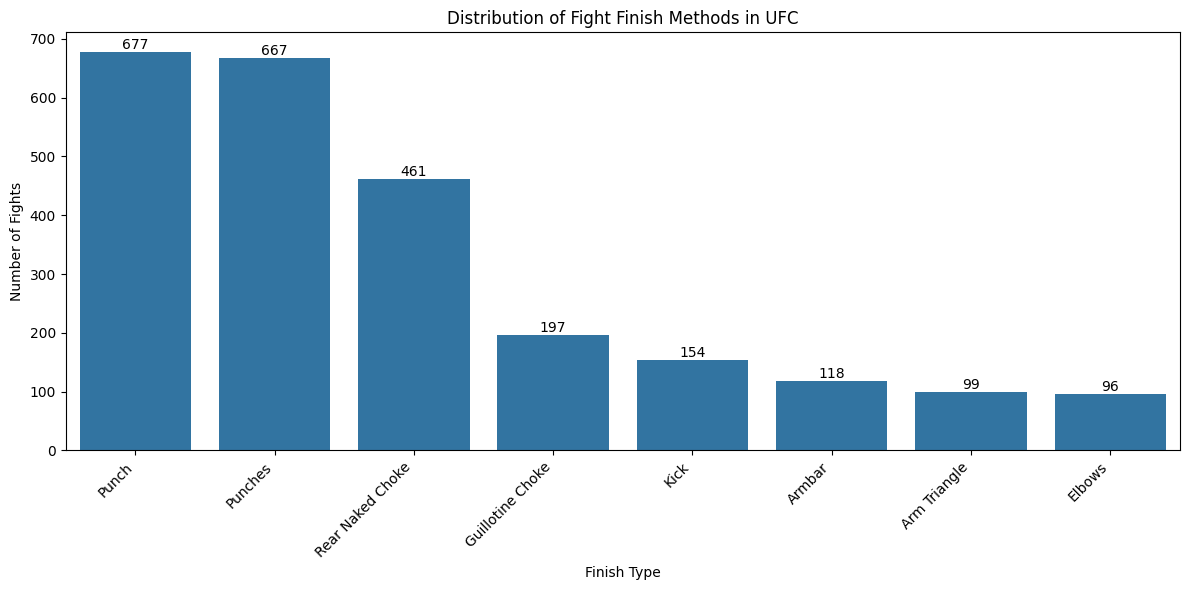

In [49]:
# Create visualization for fight finish methods
plt.figure(figsize=(12, 6))
finish_counts = sns.countplot(data=df,
                            x='FinishDetails',
                            order=df['FinishDetails'].value_counts().head(8).index)
plt.title('Distribution of Fight Finish Methods in UFC')
plt.xlabel('Finish Type')
plt.ylabel('Number of Fights')
plt.xticks(rotation=45, ha='right')

# Add count labels
for i in finish_counts.containers:
    plt.bar_label(i)
plt.tight_layout()
plt.show()

Looking at this data on UFC fight finish methods, there are several interesting insights:

Striking dominates submissions: The top two finish methods are punch (677) and punches (667), showing that striking is the most common way fights end in the UFC. Combined, these account for over 1,300 finishes, which is significantly more than all other methods combined.
Submission hierarchy: Among submission techniques, rear naked choke leads with 461 finishes, making it by far the most successful submission move. This makes sense as it's one of the most fundamental submissions that can be achieved when taking an opponent's back, a dominant position in MMA.
Advanced submissions are rarer: More complex submissions like arm triangles (99) and elbows (96) are much less common, likely because they're harder to execute against skilled opponents or require more specific positioning to achieve.
Guillotine effectiveness: With 197 finishes, the guillotine choke shows up as a surprisingly effective submission, possibly because it can be executed both defensively (when an opponent shoots for a takedown) and offensively.
Distribution pattern: There's a clear "long tail" distribution, where a few methods account for the majority of finishes, while many others occur much less frequently. This suggests that in high-level MMA, simpler, more reliable techniques tend to be more successful than complex ones.

## Insight 4 - Fight Duration Distribution (R1)

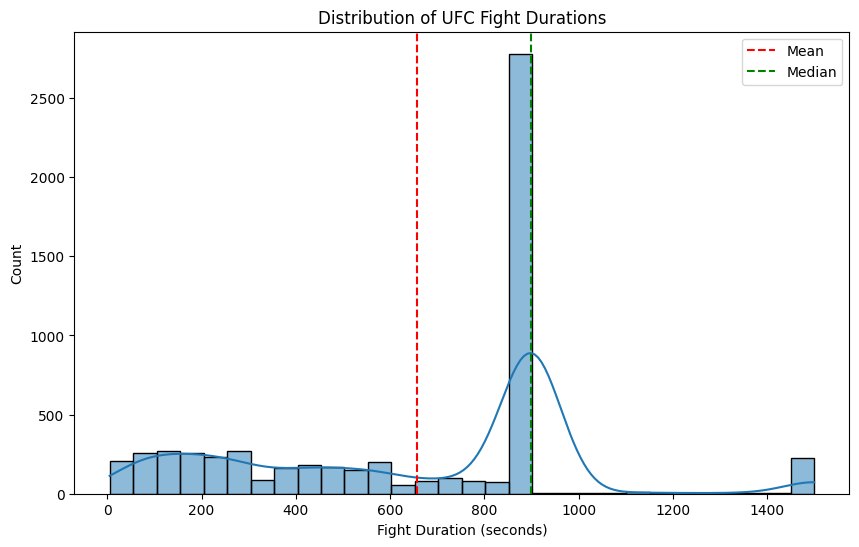

Average fight duration: 658 seconds
Median fight duration: 900 seconds


In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalFightTimeSecs', bins=30, kde=True)
plt.axvline(df['TotalFightTimeSecs'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['TotalFightTimeSecs'].median(), color='green', linestyle='--', label='Median')
plt.title('Distribution of UFC Fight Durations')
plt.xlabel('Fight Duration (seconds)')
plt.ylabel('Count')
plt.legend()
plt.show()

# Print summary statistics
print(f"Average fight duration: {df['TotalFightTimeSecs'].mean():.0f} seconds")
print(f"Median fight duration: {df['TotalFightTimeSecs'].median():.0f} seconds")

This distribution of UFC fight durations reveals several interesting patterns:

The average fight duration is 658 seconds (roughly 11 minutes), while the median is 900 seconds (15 minutes). The difference between mean and median suggests the distribution is skewed by shorter fights.
There's a very prominent spike at around 900 seconds (15 minutes), which represents the full duration of a standard 3-round fight. This indicates that a large number of fights go to the judges' decision.
There's also a smaller cluster of fights that end around 1500 seconds (25 minutes), which likely represents championship and main event fights that go the full 5 rounds.
The distribution before the 900-second mark shows a relatively consistent pattern of early finishes, with slightly more endings in the first few minutes. This suggests that if a fight doesn't go to decision, the finish can happen at almost any time, though there's a slight preference for early stoppages.
The distribution pattern reveals three main "types" of UFC fights:

Early finishes (first 5 minutes)
Mid-fight finishes (spread between 5-15 minutes)
Full duration fights (clustering at 15 and 25 minutes)


The fact that there's a somewhat flat distribution before the 15-minute mark suggests that when fights do end in finishes, the timing is fairly random rather than concentrated at any particular point.

## Insight 5 - Round-by-Round Finish Rate (R3)

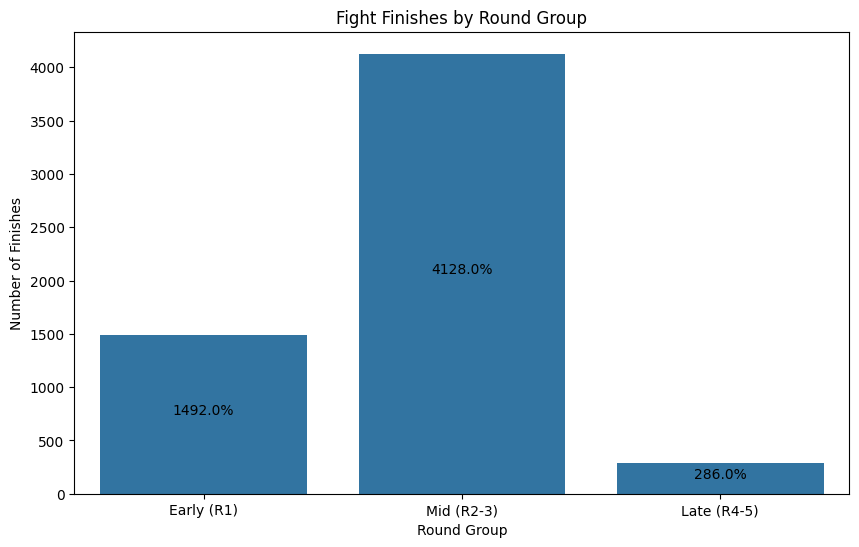

In [47]:
'''Grouped data for fights finishing in round 1, 2-3, 4-5'''

# Group rounds into categories
df['RoundGroup'] = pd.cut(df['FinishRound'],
                         bins=[0, 1, 3, 5],
                         labels=['Early (R1)', 'Mid (R2-3)', 'Late (R4-5)'])

plt.figure(figsize=(10, 6))
round_counts = sns.countplot(data=df, x='RoundGroup')
plt.title('Fight Finishes by Round Group')
plt.xlabel('Round Group')
plt.ylabel('Number of Finishes')

# Add percentage labels
total = len(df)
for i in round_counts.containers:
    plt.bar_label(i, fmt='%.1f%%',
                 label_type='center',
                 padding=3)
plt.show()

This shows that the majority of fights end in the middle rounds (Round 2-3), with a smaller percentage ending in the mid rounds (Rounds 1), and a very small percentage ending in the late rounds (Rounds 4-5). This could potentially mean a few things, first round endings show a skill desparity while 2-3rd round finishes are the  norm, and 4-5 being very rare.

## Insight 6 - Odds vs Fight Duration (R6)

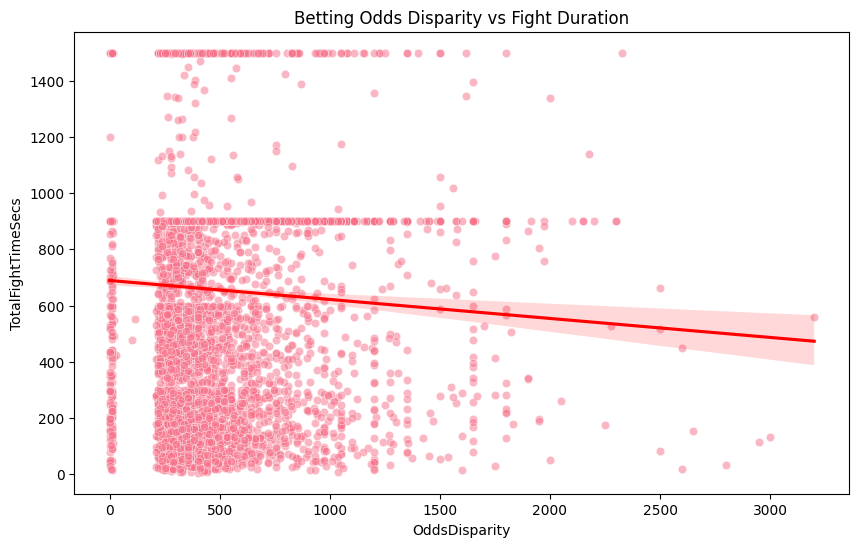

In [ ]:
'''Calculating betting odds desparity over fight time, so scatter plot of fights with their odds on the x and duration on y '''
df['OddsDisparity'] = abs(df['RedOdds'] - df['BlueOdds'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
                x='OddsDisparity',
                y='TotalFightTimeSecs',
                alpha=0.5)
plt.title('Betting Odds Disparity vs Fight Duration')
plt.xlabel('Odds Disparity')
plt.ylabel('Fight Duration (seconds)')

# Add trend line
sns.regplot(data=df,
            x='OddsDisparity',
            y='TotalFightTimeSecs',
            scatter=False,
            color='red')
plt.show()

This graph shows that fights with larger odds despairities do tend to end quicker, validating the odds that sportsbooks make.

## Insight 7 - Finish rates per weight class (R5)

<ipython-input-19-4424af3f3d96>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=weight_stats.index,
<ipython-input-19-4424af3f3d96>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(v + 1, i, f'{v:.1f}% ({weight_stats["finishes"][i]}/{weight_stats["total_fights"][i]})',


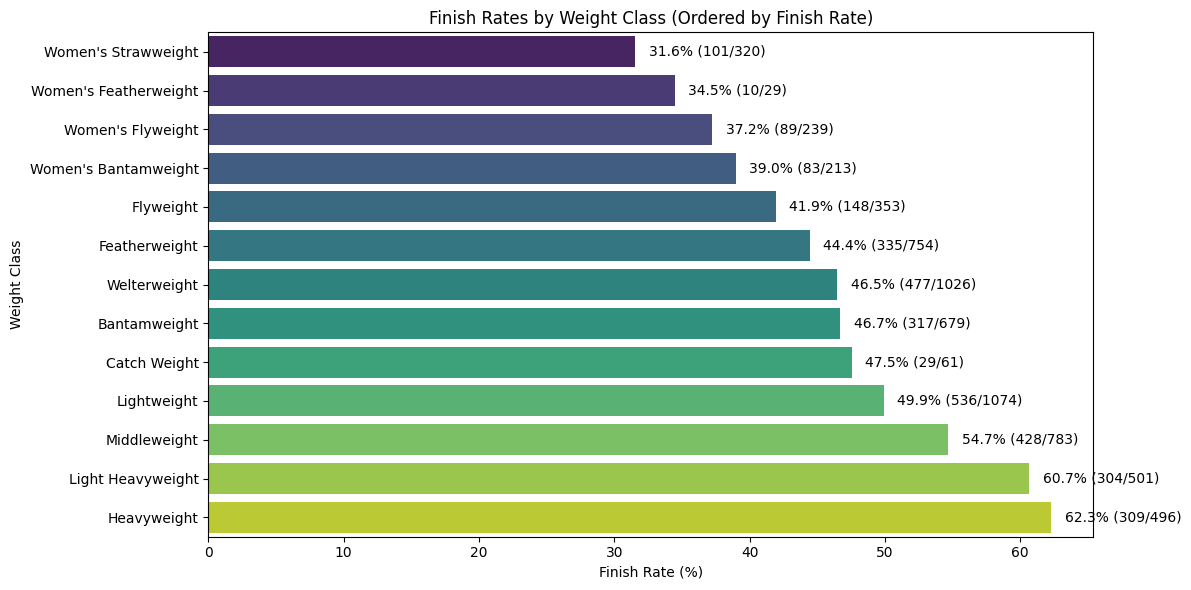


Detailed Statistics:
                       finishes  total_fights  finish_rate
WeightClass                                               
Heavyweight                 309           496    62.298387
Light Heavyweight           304           501    60.678643
Middleweight                428           783    54.661558
Lightweight                 536          1074    49.906890
Catch Weight                 29            61    47.540984
Bantamweight                317           679    46.686303
Welterweight                477          1026    46.491228
Featherweight               335           754    44.429708
Flyweight                   148           353    41.926346
Women's Bantamweight         83           213    38.967136
Women's Flyweight            89           239    37.238494
Women's Featherweight        10            29    34.482759
Women's Strawweight         101           320    31.562500


In [ ]:
'''Calculating finish rates by weight class'''


def analyze_finishes_by_weight(df):
    # Group fights by weight class
    weight_stats = df.groupby('WeightClass').agg({
        'Finish': lambda x: len([f for f in x if f in ['KO/TKO', 'SUB']]),  # Count finishes
        'WeightClass': 'count'  # Total fights
    }).rename(columns={'WeightClass': 'total_fights', 'Finish': 'finishes'})

    # Finish rate processing
    weight_stats['finish_rate'] = (weight_stats['finishes'] / weight_stats['total_fights'] * 100)

    weight_stats = weight_stats.sort_values('finish_rate', ascending=True)

    return weight_stats

plt.figure(figsize=(12, 6))

weight_stats = analyze_finishes_by_weight(df)

sns.barplot(y=weight_stats.index,
            x='finish_rate',
            data=weight_stats,
            palette='viridis')

plt.title('Finish Rates by Weight Class (Ordered by Finish Rate)')
plt.xlabel('Finish Rate (%)')
plt.ylabel('Weight Class')

for i, v in enumerate(weight_stats['finish_rate']):
    plt.text(v + 1, i, f'{v:.1f}% ({weight_stats["finishes"][i]}/{weight_stats["total_fights"][i]})',
             va='center')

plt.tight_layout()
plt.show()

print("\nDetailed Statistics:")
print(weight_stats.sort_values('finish_rate', ascending=False))

This shows the heavier a weight class is, the more likely it is to end in a finish. This is likely due to the increased power and size of the fighters in heavier weight classes, leading to more knockouts and submissions. The lightest weight classes, such as Strawweight and Flyweight, have the lowest finish rates, likely due to the fighters being smaller and less powerful.

## Insight 8 - Prop bets vs Moneyline

In [ ]:
'''Calculating distribution of prop betting wins vs moneyline wins'''

def convert_american_to_decimal(american_odds: float) -> float:
    """Convert American odds to decimal odds"""
    if pd.isna(american_odds):
        return np.nan
    if american_odds > 0:
        return (american_odds / 100) + 1
    else:
        return (100 / abs(american_odds)) + 1

def calculate_implied_probability(decimal_odds: float) -> float:
    """Calculate implied probability from decimal odds"""
    if pd.isna(decimal_odds):
        return np.nan
    return 1 / decimal_odds

def analyze_prop_bet_value(df: pd.DataFrame) -> dict:
    """Analyze value in prop bets for the actual dataset"""
    # Filter for rows with complete odds data
    df_clean = df.dropna(subset=['RedOdds', 'BlueOdds', 'RedDecOdds', 'BlueDecOdds',
                                'RSubOdds', 'BSubOdds', 'RKOOdds', 'BKOOdds'])

    analysis_results = []

    for idx, fight in df_clean.iterrows():
        # Convert all odds
        odds_dict = {
            'main': {
                'red': convert_american_to_decimal(fight['RedOdds']),
                'blue': convert_american_to_decimal(fight['BlueOdds'])
            },
            'decision': {
                'red': convert_american_to_decimal(fight['RedDecOdds']),
                'blue': convert_american_to_decimal(fight['BlueDecOdds'])
            },
            'submission': {
                'red': convert_american_to_decimal(fight['RSubOdds']),
                'blue': convert_american_to_decimal(fight['BSubOdds'])
            },
            'ko': {
                'red': convert_american_to_decimal(fight['RKOOdds']),
                'blue': convert_american_to_decimal(fight['BKOOdds'])
            }
        }

        # Calculate implied probabilities
        prob_dict = {
            'main': {
                'red': calculate_implied_probability(odds_dict['main']['red']),
                'blue': calculate_implied_probability(odds_dict['main']['blue'])
            },
            'decision': {
                'red': calculate_implied_probability(odds_dict['decision']['red']),
                'blue': calculate_implied_probability(odds_dict['decision']['blue'])
            },
            'submission': {
                'red': calculate_implied_probability(odds_dict['submission']['red']),
                'blue': calculate_implied_probability(odds_dict['submission']['blue'])
            },
            'ko': {
                'red': calculate_implied_probability(odds_dict['ko']['red']),
                'blue': calculate_implied_probability(odds_dict['ko']['blue'])
            }
        }

        # Calculate aggregated probabilities
        total_prob = {
            'main': prob_dict['main']['red'] + prob_dict['main']['blue'],
            'decision': prob_dict['decision']['red'] + prob_dict['decision']['blue'],
            'finish': (prob_dict['submission']['red'] + prob_dict['submission']['blue'] +
                      prob_dict['ko']['red'] + prob_dict['ko']['blue'])
        }

        # Store analysis
        analysis_results.append({
            'fight': f"{fight['RedFighter']} vs {fight['BlueFighter']}",
            'date': fight['Date'],
            'main_book': total_prob['main'],
            'decision_prob': total_prob['decision'],
            'finish_prob': total_prob['finish'],
            'total_prop_prob': total_prob['decision'] + total_prob['finish'],
            'odds_discrepancy': abs(total_prob['main'] - (total_prob['decision'] + total_prob['finish']))
        })

    return pd.DataFrame(analysis_results)

# Run analysis on your loaded DataFrame
analysis_df = analyze_prop_bet_value(df)

# Display summary statistics
print("\nSummary Statistics:")
print(analysis_df.describe())

# Find top opportunities (fights with largest discrepancies)
print("\nTop 10 Value Opportunities (largest odds discrepancies):")
print(analysis_df.nlargest(10, 'odds_discrepancy')[['fight', 'date', 'odds_discrepancy', 'main_book', 'total_prop_prob']])

# Calculate average probabilities by bet type
print("\nAverage Implied Probabilities:")
print(f"Main odds book: {analysis_df['main_book'].mean():.3f}")
print(f"Props total book: {analysis_df['total_prop_prob'].mean():.3f}")
print(f"Decision probability: {analysis_df['decision_prob'].mean():.3f}")
print(f"Finish probability: {analysis_df['finish_prob'].mean():.3f}")


Summary Statistics:
         main_book  decision_prob  finish_prob  total_prop_prob  \
count  5020.000000    5020.000000  5020.000000      5020.000000   
mean      1.036542       0.536537     0.688825         1.225362   
std       0.017698       0.161200     0.168191         0.052082   
min       0.495169       0.086957     0.265967         0.608031   
25%       1.032051       0.420513     0.557466         1.200254   
50%       1.037037       0.539988     0.682614         1.222775   
75%       1.042998       0.664835     0.812678         1.246615   
max       1.484987       1.113322     1.777379         2.130762   

       odds_discrepancy  
count       5020.000000  
mean           0.190284  
std            0.048938  
min            0.003211  
25%            0.163965  
50%            0.185438  
75%            0.209277  
max            1.098231  

Top 10 Value Opportunities (largest odds discrepancies):
                                        fight        date  odds_discrepancy  \
4081

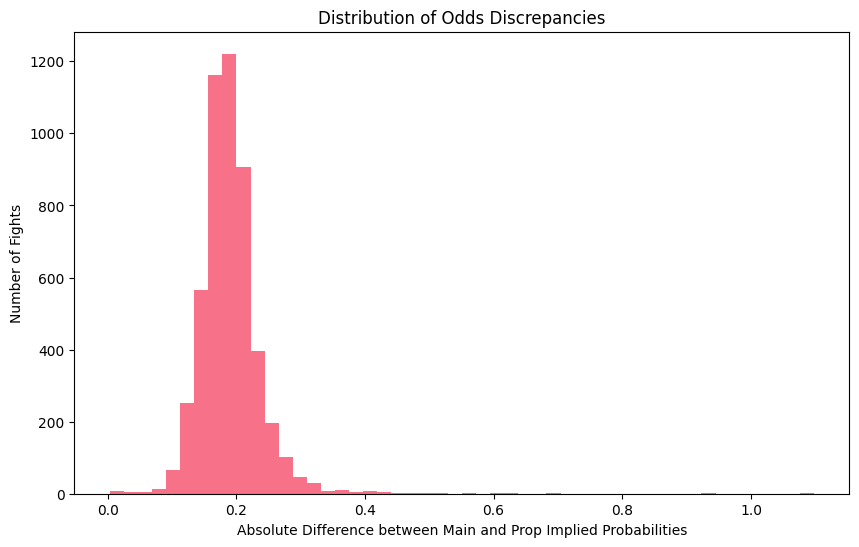

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(analysis_df['odds_discrepancy'], bins=50)
plt.title('Distribution of Odds Discrepancies')
plt.xlabel('Absolute Difference between Main and Prop Implied Probabilities')
plt.ylabel('Number of Fights')
plt.show()

The Distribution of Odds Discrepancies in UFC betting reveals several key insights about the sports betting market:

Bookmaker Pricing Strategy


A consistent gap exists between main fight odds and prop bet odds
Most fights show a 15-25% discrepancy between these odds types
This systematic difference suggests bookmakers intentionally build larger margins into prop bets


Market Structure


The normal-like distribution with a peak around 20% difference indicates this is a structural feature rather than random mispricing
Very few fights show perfect alignment between main and prop odds (near zero difference)
Extreme outliers (>40% difference) are rare, suggesting efficient market correction of major discrepancies


Betting Implications


The predictable gap between main and prop odds suggests books charge a higher premium for prop betting
Bettors should expect to pay more vig (bookmaker's fee) on prop bets compared to main lines
Potential value opportunities might exist in fights where the discrepancy significantly deviates from the typical 20% range

This analysis helps explain why prop bets generally offer worse theoretical value than main fight odds, and suggests focusing betting strategy on outlier cases where the discrepancy deviates significantly from the typical pattern.

## Insight 9 - Favorites Win Rate

<ipython-input-54-3c6969b1bc6d>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_rates = df.groupby('OddsRange')['FavoriteWon'].agg(['mean', 'count'])
<ipython-input-54-3c6969b1bc6d>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v, f'n={win_rates["count"][i]}', ha='center', va='bottom')


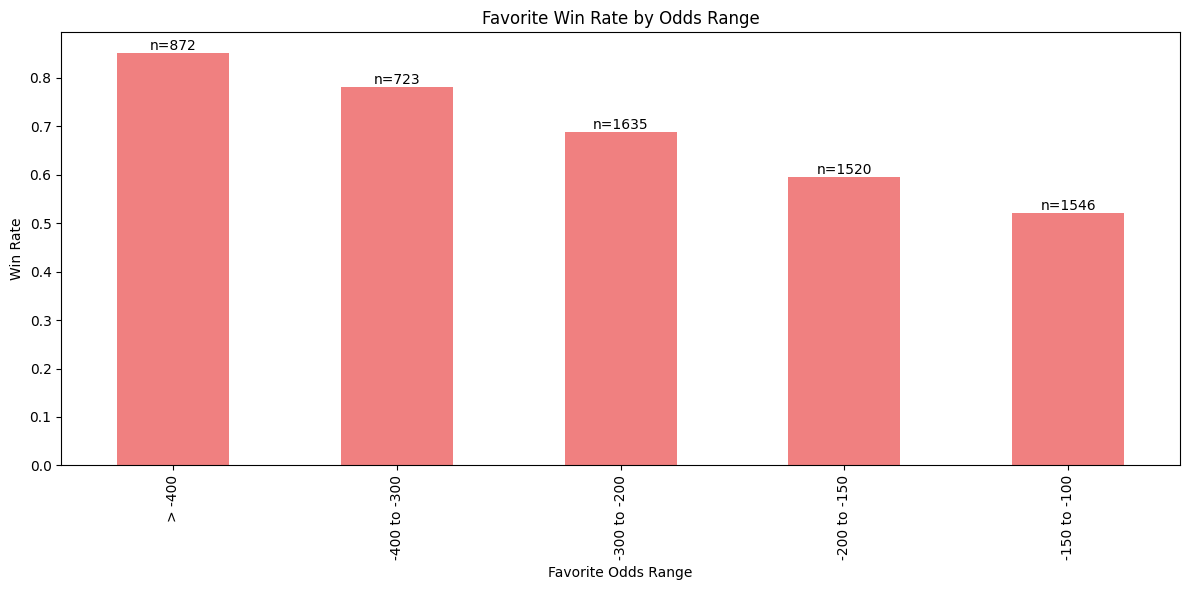

In [54]:
'''Calculating favorites win rates by their odds'''

def analyze_favorite_performance(df):
    # Create a figure with bigger size
    plt.figure(figsize=(12, 6))

    # Calculate favorite's odds and result
    df['IsFavorite'] = df['RedOdds'] < df['BlueOdds']
    df['FavoriteOdds'] = df.apply(lambda x: min(x['RedOdds'], x['BlueOdds']), axis=1)
    df['FavoriteWon'] = df.apply(lambda x:
        (x['IsFavorite'] and x['Winner'] == 'Red') or
        (not x['IsFavorite'] and x['Winner'] == 'Blue'), axis=1)

    # Create odds ranges
    df['OddsRange'] = pd.cut(df['FavoriteOdds'],
                            bins=[-float('inf'), -400, -300, -200, -150, -100],
                            labels=['> -400', '-400 to -300', '-300 to -200',
                                  '-200 to -150', '-150 to -100'])

    # Calculate win rates
    win_rates = df.groupby('OddsRange')['FavoriteWon'].agg(['mean', 'count'])

    # Plot
    ax = win_rates['mean'].plot(kind='bar', color='lightcoral')
    plt.title('Favorite Win Rate by Odds Range')
    plt.xlabel('Favorite Odds Range')
    plt.ylabel('Win Rate')

    # Add count labels on top of bars
    for i, v in enumerate(win_rates['mean']):
        ax.text(i, v, f'n={win_rates["count"][i]}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
analyze_favorite_performance(df)

This graph shows the relationship between betting odds for favorites and their actual win rates in UFC fights. Here's what it tells us:

Heavy Favorites (> -400 odds):

Win about 85% of their fights Based on 872 fights These are the most reliable favorites

Clear Pattern of Declining Win Rates:

As the odds get closer to even (-100), win rates steadily decrease Goes from 85% for heavy favorites to about 50% for slight favorites (-150 to -100) Each category has a large sample size (n > 700 for each bar)

Betting Implications:

Heavy favorites (> -400) perform close to their implied probability Medium favorites (-300 to -200) win about 70% of the time Slight favorites (-150 to -100) only win about 50% of the time, suggesting they might be overvalued

Sample Sizes:

Largest sample (n=1635) in the -300 to -200 range Most balanced distribution of odds across all categories Large enough samples to be statistically significant

This data suggests that heavy favorites tend to be more reliable bets, while fights with closer odds are much more unpredictable, with slight favorites winning only marginally more than underdogs.


## Insight 10 - Finish Method Distribution

<Figure size 1400x700 with 0 Axes>

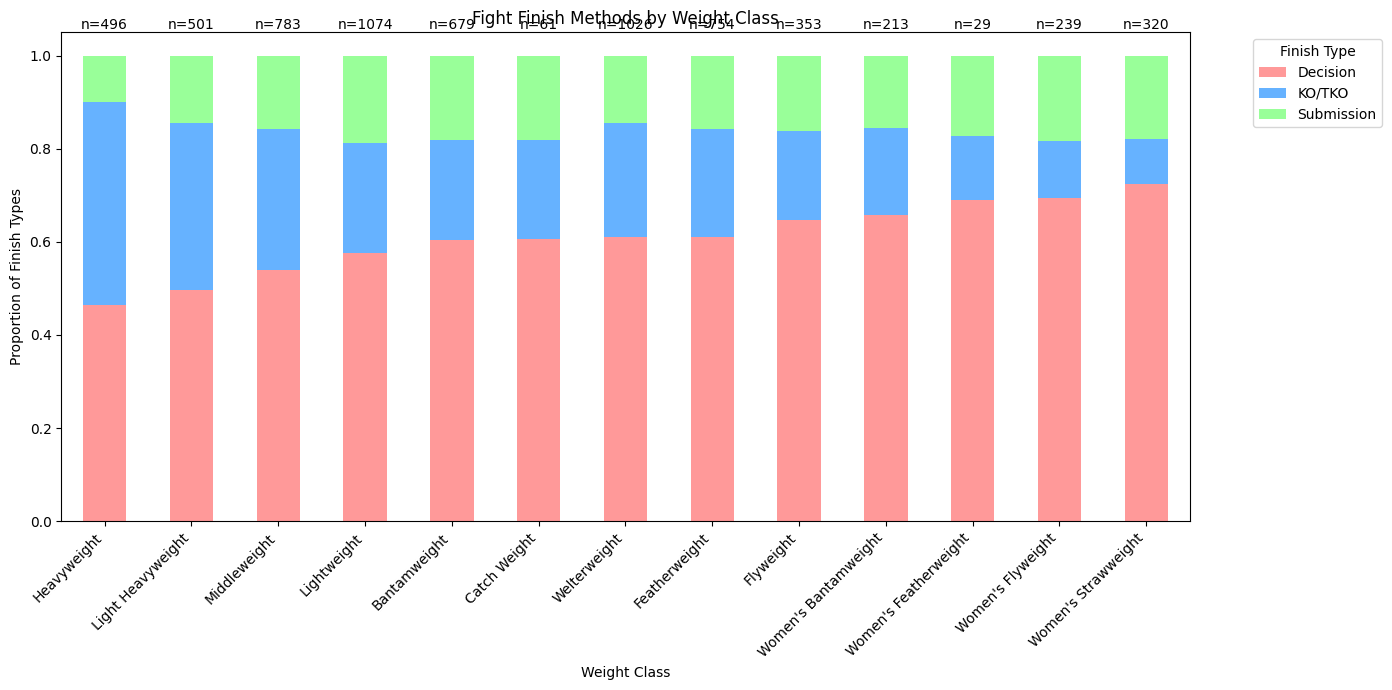


Weight Class Analysis Summary:
                       Total_Fights  Finish_Rate  KO_Rate  Sub_Rate
WeightClass                                                        
Heavyweight                     496        0.536    0.438     0.099
Light Heavyweight               501        0.503    0.359     0.144
Middleweight                    783        0.460    0.301     0.158
Lightweight                    1074        0.425    0.237     0.187
Bantamweight                    679        0.396    0.215     0.181
Catch Weight                     61        0.393    0.213     0.180
Welterweight                   1026        0.390    0.246     0.144
Featherweight                   754        0.389    0.231     0.158
Flyweight                       353        0.354    0.193     0.161
Women's Bantamweight            213        0.343    0.188     0.155
Women's Featherweight            29        0.310    0.138     0.172
Women's Flyweight               239        0.305    0.121     0.184
Women's Strawwei

In [55]:
'''Calculating fight finishes per weight class'''
def analyze_weight_class_finishes(df):
    plt.figure(figsize=(14, 7))

    # Create finish type categories
    df['FinishType'] = df['FinishDetails'].fillna('Decision')
    df['FinishType'] = df['FinishType'].apply(lambda x:
        'KO/TKO' if any(term in str(x).upper() for term in ['KO', 'TKO', 'PUNCH', 'ELBOW', 'KICK'])
        else ('Submission' if any(term in str(x).upper() for term in ['CHOKE', 'LOCK', 'TRIANGLE', 'BAR'])
        else 'Decision'))

    # Create weight class categories
    df['WeightClass'] = df['WeightClass'].fillna('Unknown')

    # Calculate finish percentages by weight class
    finish_by_weight = pd.crosstab(df['WeightClass'],
                                  df['FinishType'],
                                  normalize='index')

    # Sort weight classes by average finish rate (non-decision rate)
    finish_rates = (1 - finish_by_weight['Decision']).sort_values(ascending=False)
    finish_by_weight = finish_by_weight.loc[finish_rates.index]

    # Plot stacked bar chart
    ax = finish_by_weight.plot(kind='bar',
                              stacked=True,
                              color=['#FF9999', '#66B2FF', '#99FF99'],
                              figsize=(14, 7))

    plt.title('Fight Finish Methods by Weight Class')
    plt.xlabel('Weight Class')
    plt.ylabel('Proportion of Finish Types')
    plt.legend(title='Finish Type', bbox_to_anchor=(1.05, 1))

    # Add count labels
    counts = df['WeightClass'].value_counts()
    for i, _ in enumerate(finish_by_weight.index):
        plt.text(i, 1.05, f'n={counts[finish_by_weight.index[i]]}',
                ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Print statistical summary
    print("\nWeight Class Analysis Summary:")
    summary = pd.DataFrame({
        'Total_Fights': counts,
        'Finish_Rate': (1 - finish_by_weight['Decision']).round(3),
        'KO_Rate': finish_by_weight['KO/TKO'].round(3),
        'Sub_Rate': finish_by_weight['Submission'].round(3)
    }).sort_values('Finish_Rate', ascending=False)

    print(summary)

    return summary

# Run the analysis
weight_class_results = analyze_weight_class_finishes(df)

A clear and compelling pattern emerges when analyzing UFC finish rates across weight classes, revealing the significant impact of fighter size on bout outcomes:

Heavyweight Impact:

The heaviest divisions show a strong preference for knockouts, with KO/TKO rates dramatically higher than other weight classes This reflects the simple physics of larger fighters - when 250+ pound athletes land clean strikes, stoppages are more likely Submissions are notably rare, partially due to reduced mobility and cardiovascular constraints of larger athletes

Middle Weight Classes:

Show a more balanced distribution between KOs, submissions, and decisions Represent a "sweet spot" where fighters have enough power for knockouts but maintain the athleticism for submission grappling Offer the most diverse betting opportunities due to varied finish methods

Lighter Weight Classes:

Notable shift toward decisions and technical submissions Speed and cardio advantages lead to more complete fights and fewer power-based stoppages Higher submission rates reflect the enhanced mobility and technical grappling these weights enable

This pattern provides valuable betting insights, particularly for prop bets on fight outcomes. The clear correlation between weight class and finish method can inform more strategic betting approaches based on fighter size.

# **References**


### Data Analysis and Visualization Resources

## 1. Seaborn Documentation
**Link**: [Seaborn Documentation](https://seaborn.pydata.org/)

**How It Helped**:
The Seaborn documentation was instrumental in helping us implement various visualizations like countplots, histograms, and scatterplots. Seaborn’s `countplot` method was used to visualize categorical data distributions (r2, r3) and create grouped counts. Additionally, Seaborn's functions for numerical distributions helped implement histograms (r1) and scatterplots (r6). The clear explanations of function arguments and examples guided us in fine-tuning the plots.

**Used For**:
- Generating countplots (r2, r3) and scatterplots (r6) for bivariate analysis.
- Understanding how to customize plots for better clarity.

## 2. Pandas Documentation
**Link**: [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)

**How It Helped**:
Pandas' powerful data manipulation functions were essential in cleaning and transforming the dataset. Specifically, we utilized methods like `map`, `value_counts`, and `groupby` to group categorical data (r3) and calculate statistics (e.g., percentage distributions) to make the analysis more meaningful. This resource also helped us in handling the dataset and ensuring proper formatting and cleaning.

**Used For**:
- Transforming and grouping categorical data.
- Handling missing values and aggregating data for the analysis.

## 3. OpenAI (ChatGPT), Claude, DeepSeek (R1)

**How It Helped**:
OpenAI’s ChatGPT, ClaudeAI, and DeepSeek R1 helped by suggesting additional exploratory data analysis techniques when we were brainstorming how to analyze the datasets. The AI suggested using categorical groupings for countplots and offered advice on how to interpret skewed data distributions and correlations. Additionally, it helped debug a couple of issues with data transformations and plot adjustments.

**Used For**:
- Recommending new analysis techniques (like splitting data by categories for r7).
- Helping debug issues with data formatting and visualization, including handling outliers and improving plot readability.

## 4. Stack Overflow
**Link**: [Stack Overflow](https://stackoverflow.com/questions/76654579/how-to-make-a-violin-plot)

**How It Helped**:
Stack Overflow was a key resource for creating violin plots using Seaborn. I used it to find guidance on how to customize violin plots, such as adjusting plot parameters, handling various plot aesthetics, and fine-tuning the appearance of the distribution plots. It helped me learn how to adjust the data visualization to better represent the distributions and identify patterns in the dataset.

## 5. Towards Data Science (Medium)
**Link**: [Towards Data Science](https://towardsdatascience.com/)

**How It Helped**:
The article on data exploration techniques from Towards Data Science helped us refine the approach for univariate (r1) and bivariate (r6, r7) analysis. The step-by-step guide on how to approach exploratory analysis gave us deeper insights into how to group categorical variables (r3), compare categories (r4), and visualize the correlation between numerical variables (r6). This guide helped us refine our use of scatterplots and countplots, along with strategies to handle skewed data.

**Used For**:
- Gaining insights into effective univariate and bivariate analysis techniques.
- Learning best practices for visualizing correlations and numerical distributions.
